In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from ggplot import *
import pysam

In [3]:
samples = [
    {'id': 'skm01', 'Ab': 'FLAG', 'control': 'skm27', 'name': 'HepFLAG-WTS1-FLAG'},
    {'id': 'skm02', 'Ab': 'RNAP', 'control': 'skm27', 'name': 'HepFLAG-WTS1-RNAP'},
    {'id': 'skm03', 'Ab': 'S9.6', 'control': 'skm27', 'name': 'HepFLAG-WTS1-S9.6'},

    {'id': 'skm04', 'Ab': 'FLAG', 'control': 'skm28', 'name': 'HepFLAG-S1d56-FLAG'},
    {'id': 'skm05', 'Ab': 'RNAP', 'control': 'skm28', 'name': 'HepFLAG-S1d56-RNAP'},
    {'id': 'skm06', 'Ab': 'S9.6', 'control': 'skm28', 'name': 'HepFLAG-S1d56-S9.6'},
    
    {'id': 'skm07', 'Ab': 'FLAG', 'control': 'skm28', 'name': 'S1d56-HepFLAG-FLAG'},
    {'id': 'skm08', 'Ab': 'RNAP', 'control': 'skm28', 'name': 'S1d56-HepFLAG-RNAP'},
    {'id': 'skm09', 'Ab': 'S9.6', 'control': 'skm28', 'name': 'S1d56-HepFLAG-S9.6'},
    
    {'id': 'skm10', 'Ab': 'FLAG', 'control': 'skm30', 'name': 'S1FLAG-dHep-FLAG'},
    {'id': 'skm11', 'Ab': 'RNAP', 'control': 'skm30', 'name': 'S1FLAG-dHep-RNAP'},
    {'id': 'skm12', 'Ab': 'S9.6', 'control': 'skm30', 'name': 'S1FLAG-dHep-S9.6'},
    
    {'id': 'skm13', 'Ab': 'FLAG', 'control': 'skm25', 'name': 'Hep-FLAG_V-FLAG'},
    {'id': 'skm14', 'Ab': 'RNAP', 'control': 'skm25', 'name': 'Hep-FLAG_V-RNAP'},
    {'id': 'skm15', 'Ab': 'S9.6', 'control': 'skm25', 'name': 'Hep-FLAG_V-S9.6'},
    
    {'id': 'skm16', 'Ab': 'FLAG', 'control': 'skm26', 'name': 'Hep-FLAG_rnh-FLAG'},
    {'id': 'skm17', 'Ab': 'RNAP', 'control': 'skm26', 'name': 'Hep-FLAG_rnh-RNAP'},
    {'id': 'skm18', 'Ab': 'S9.6', 'control': 'skm26', 'name': 'Hep-FLAG_rnh-S9.6'},
    
    {'id': 'skm19', 'Ab': 'FLAG', 'control': 'skm25', 'name': 'S1-FLAG_V-FLAG'},
    {'id': 'skm20', 'Ab': 'RNAP', 'control': 'skm25', 'name': 'S1-FLAG_V-RNAP'},
    {'id': 'skm21', 'Ab': 'S9.6', 'control': 'skm25', 'name': 'S1-FLAG_V-S9.6'},
    
    {'id': 'skm22', 'Ab': 'FLAG', 'control': 'skm26', 'name': 'S1-FLAG_rnh-FLAG'},
    {'id': 'skm23', 'Ab': 'RNAP', 'control': 'skm26', 'name': 'S1-FLAG_rnh-RNAP'},
    {'id': 'skm24', 'Ab': 'S9.6', 'control': 'skm26', 'name': 'S1-FLAG_rnh-S9.6'},
]

In [4]:
ls -lah ../results/skm01/

total 1.4G
drwxr-xr-x  2 ilya ilya 4.0K Oct 31 08:19 ./
drwxr-xr-x 36 ilya lab  4.0K Oct 24 23:00 ../
-rw-r--r--  1 ilya ilya  44K Oct 28 10:44 HepFLAG-WTS1-FLAG_peaks.narrowPeak
-rw-r--r--  1 ilya ilya  49K Oct 28 10:44 HepFLAG-WTS1-FLAG_peaks.xls
-rw-r--r--  1 ilya ilya  33K Oct 28 10:44 HepFLAG-WTS1-FLAG_summits.bed
-rw-r--r--  1 ilya ilya 767M Oct 24 19:26 skm01.bam
-rw-r--r--  1 ilya ilya  60K Oct 31 08:19 skm01.cm.csv
-rw-r--r--  1 ilya ilya 626M Oct 25 08:32 skm01_sorted.bam
-rw-r--r--  1 ilya ilya  15K Oct 25 09:02 skm01_sorted.bam.bai


In [12]:
cm_tpl = "../results/{id}/{id}.cm.csv"

for sample in samples:
    sample_cm = cm_tpl.format(id=sample['id'])
    print("\t...reading {} ...".format(sample['id']))
    sample['cm'] = pd.DataFrame.from_csv(sample_cm)[['offset', 'coverage', 'strand']]

	...reading skm01 ...
	...reading skm02 ...
	...reading skm03 ...
	...reading skm04 ...
	...reading skm05 ...
	...reading skm06 ...
	...reading skm07 ...
	...reading skm08 ...
	...reading skm09 ...
	...reading skm10 ...
	...reading skm11 ...
	...reading skm12 ...
	...reading skm13 ...
	...reading skm14 ...
	...reading skm15 ...
	...reading skm16 ...
	...reading skm17 ...
	...reading skm18 ...
	...reading skm19 ...
	...reading skm20 ...
	...reading skm21 ...
	...reading skm22 ...
	...reading skm23 ...
	...reading skm24 ...


In [15]:
%%bash

samtools view -F 0x4 ../results/skm01/skm01_sorted.bam | cut -f 1 | sort | uniq | wc -l

8413047


In [16]:
nr = !samtools view -F 0x4 ../results/skm01/skm01_sorted.bam | cut -f 1 | sort | uniq | wc -l
nr

['8413047']

In [24]:
bam_tpl = "../results/{id}/{id}_sorted.bam"

for sample in samples:
    sample_bam = bam_tpl.format(id=sample['id'])
    print("\t...normalizing {} ...".format(sample['id']))
    res = !samtools view -F 0x4 $sample_bam | cut -f 1 | sort | uniq | wc -l
    nr = int(res[0])
    sample['cm']['coverage_norm'] = sample['cm']['coverage'] / nr * 10e6

	...normalizing skm01 ...
	...normalizing skm02 ...
	...normalizing skm03 ...
	...normalizing skm04 ...
	...normalizing skm05 ...
	...normalizing skm06 ...
	...normalizing skm07 ...
	...normalizing skm08 ...
	...normalizing skm09 ...
	...normalizing skm10 ...
	...normalizing skm11 ...
	...normalizing skm12 ...
	...normalizing skm13 ...
	...normalizing skm14 ...
	...normalizing skm15 ...
	...normalizing skm16 ...
	...normalizing skm17 ...
	...normalizing skm18 ...
	...normalizing skm19 ...
	...normalizing skm20 ...
	...normalizing skm21 ...
	...normalizing skm22 ...
	...normalizing skm23 ...
	...normalizing skm24 ...


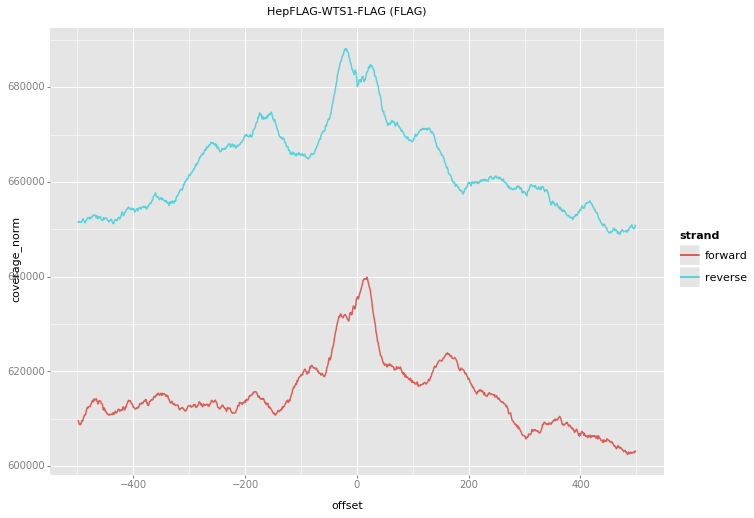

<ggplot: (8773188120398)>


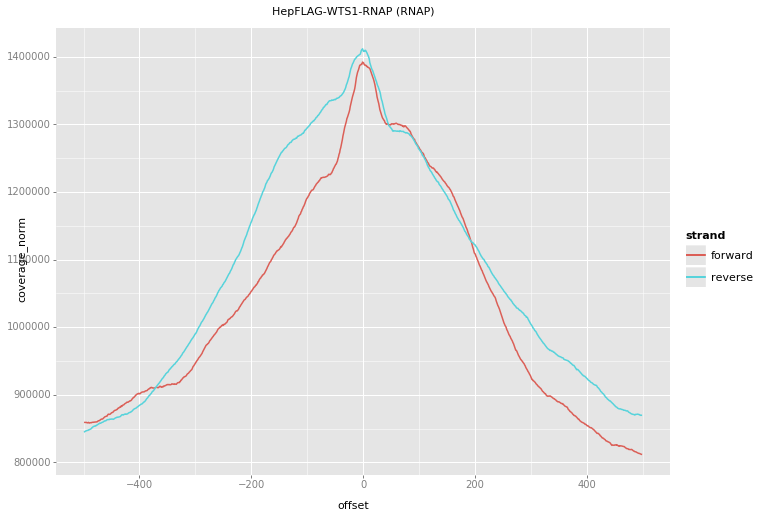

<ggplot: (-9223363263666685408)>


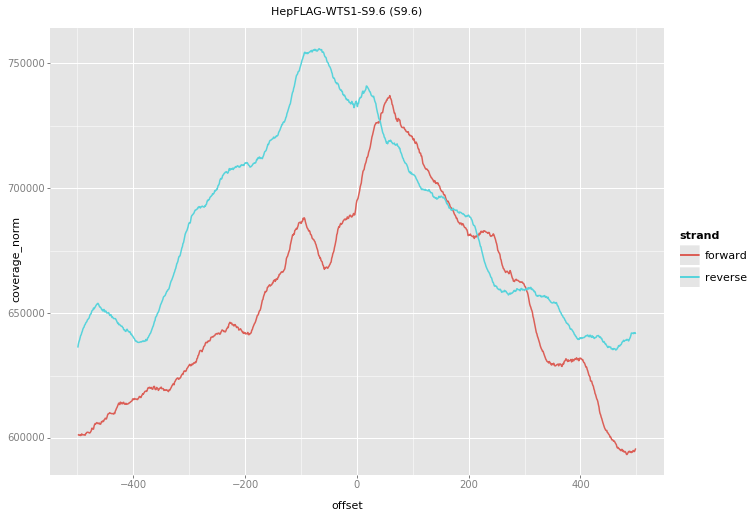

<ggplot: (8773187973317)>


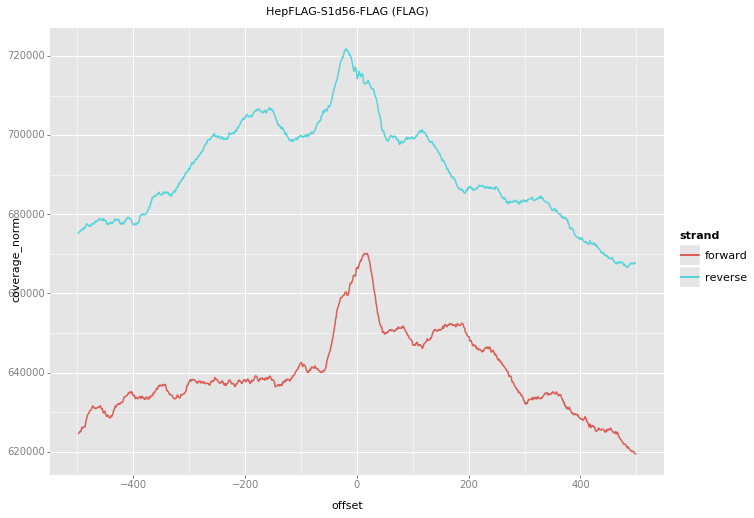

<ggplot: (8773187941373)>


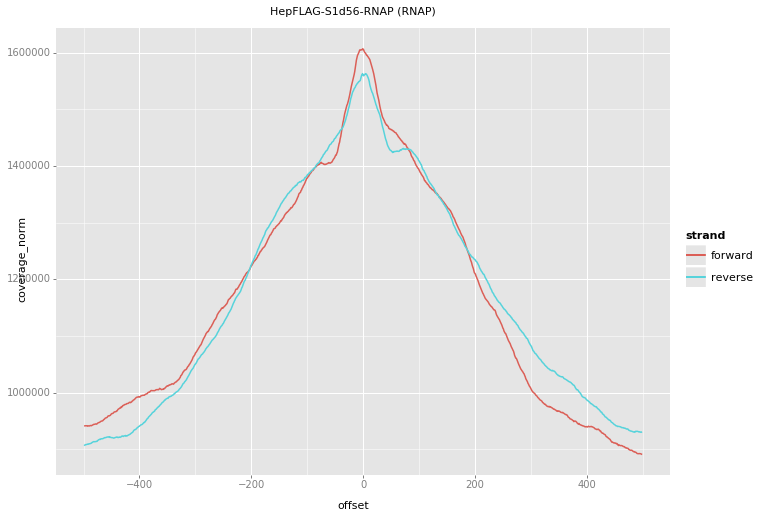

<ggplot: (-9223363263666863044)>


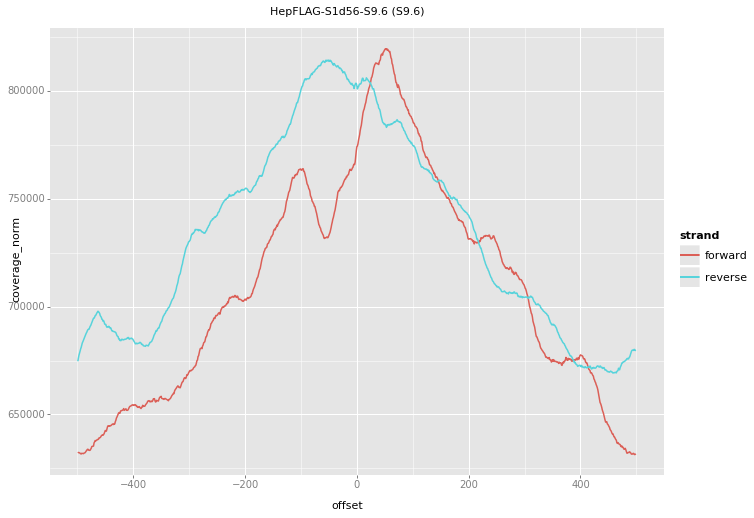

<ggplot: (8773187875939)>


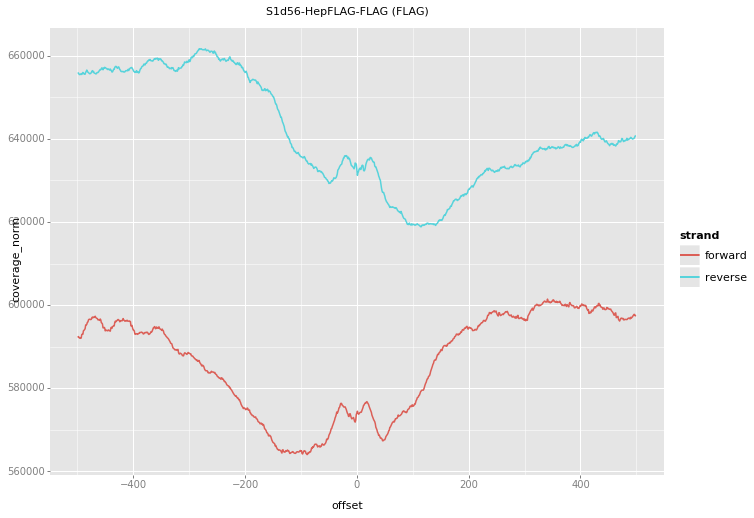

<ggplot: (8773187830781)>


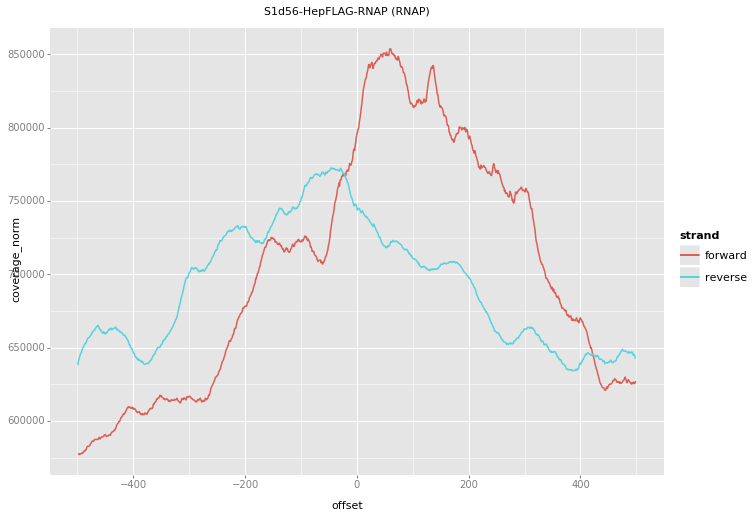

<ggplot: (-9223363263666980825)>


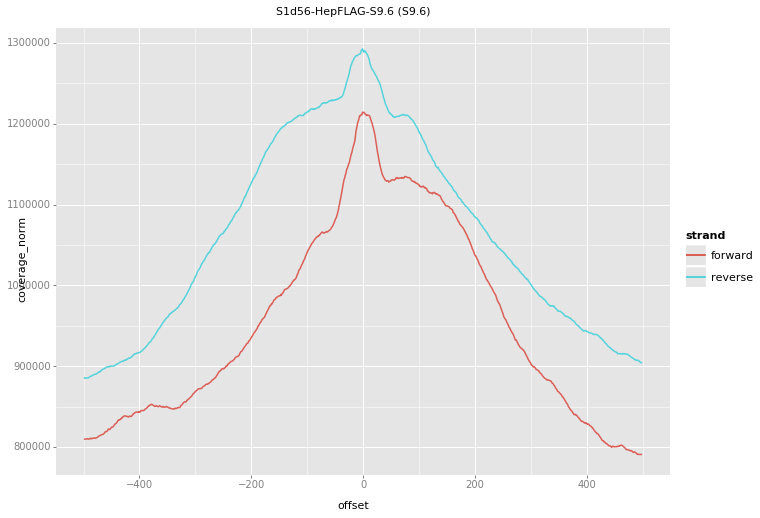

<ggplot: (8773187767423)>


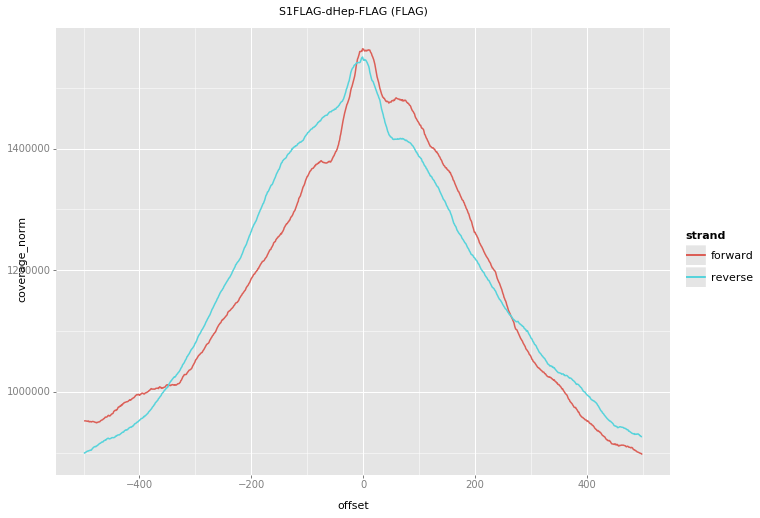

<ggplot: (-9223363263667061458)>


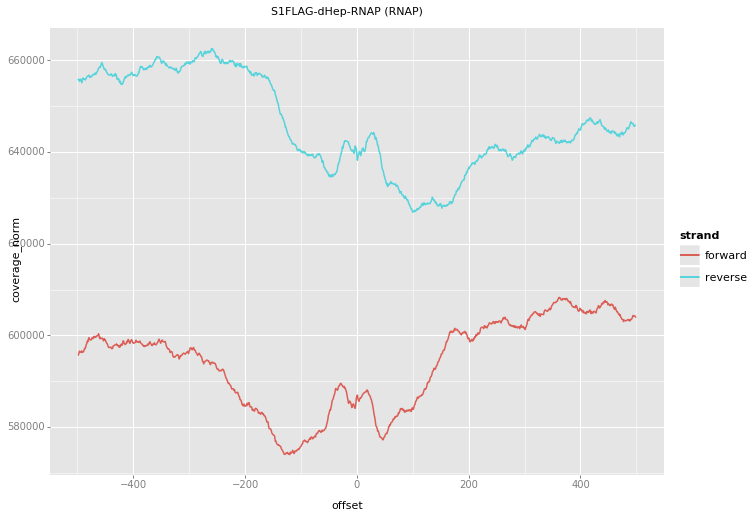

<ggplot: (8773187688284)>


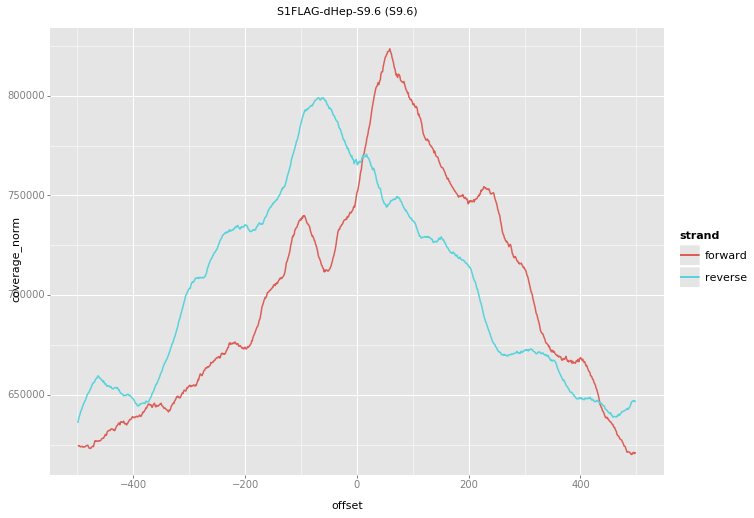

<ggplot: (-9223363263667020961)>


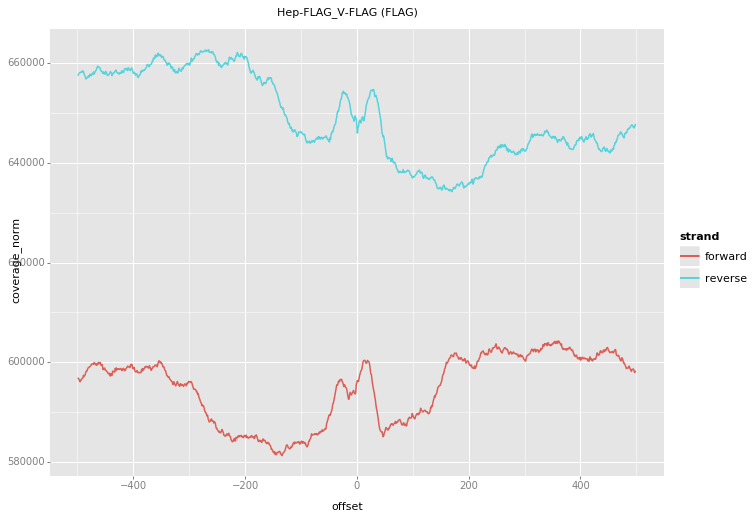

<ggplot: (8773187912161)>


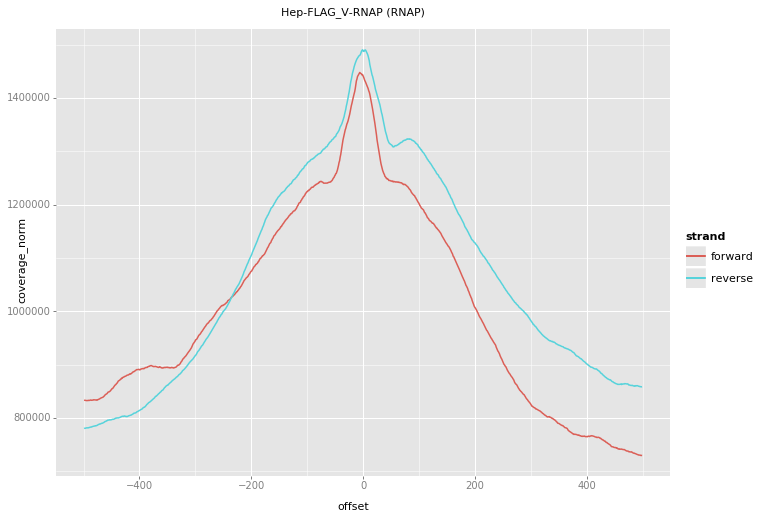

<ggplot: (8773187968299)>


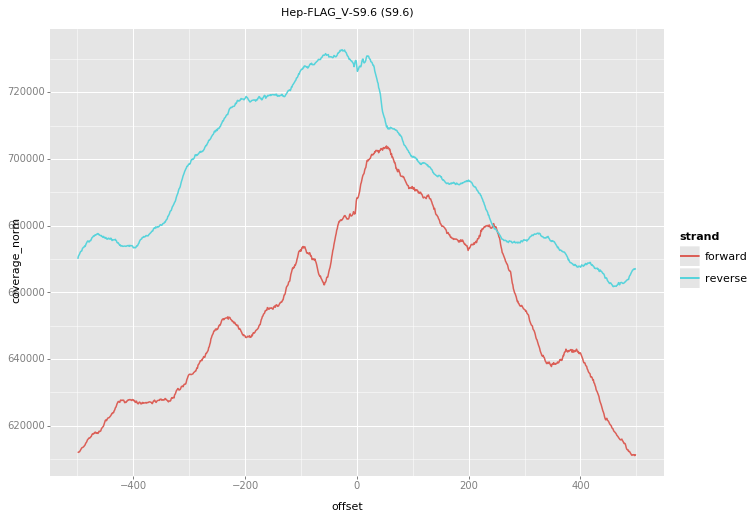

<ggplot: (-9223363263666718141)>


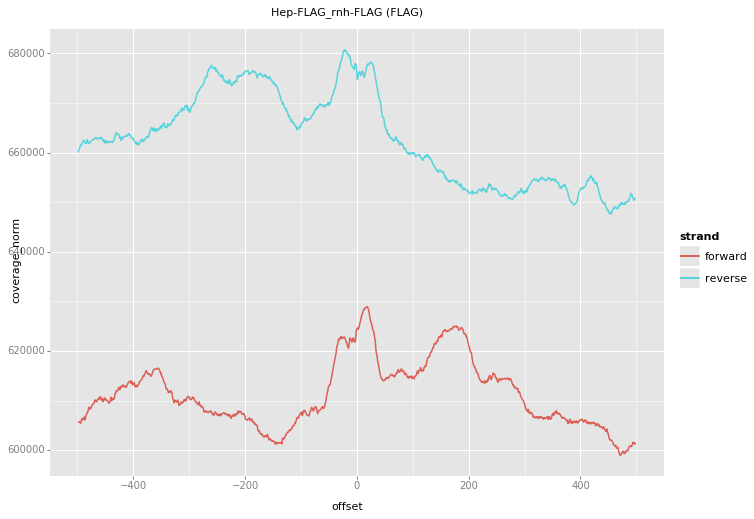

<ggplot: (-9223363263667045765)>


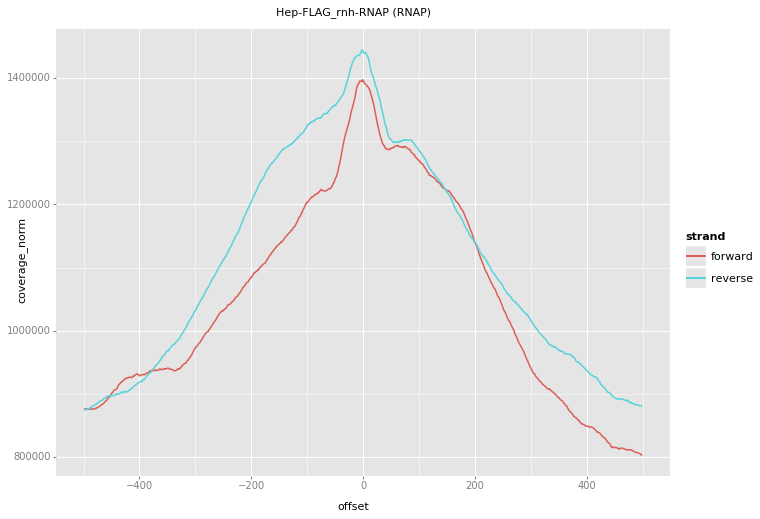

<ggplot: (-9223363263666735044)>


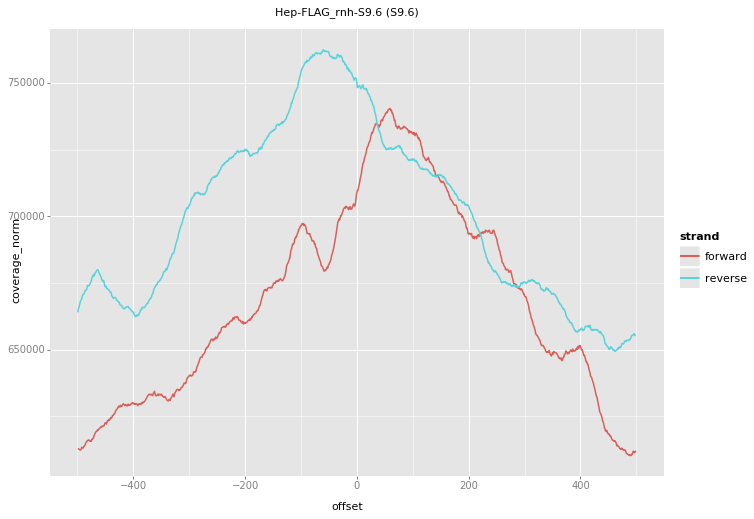

<ggplot: (8773187824150)>


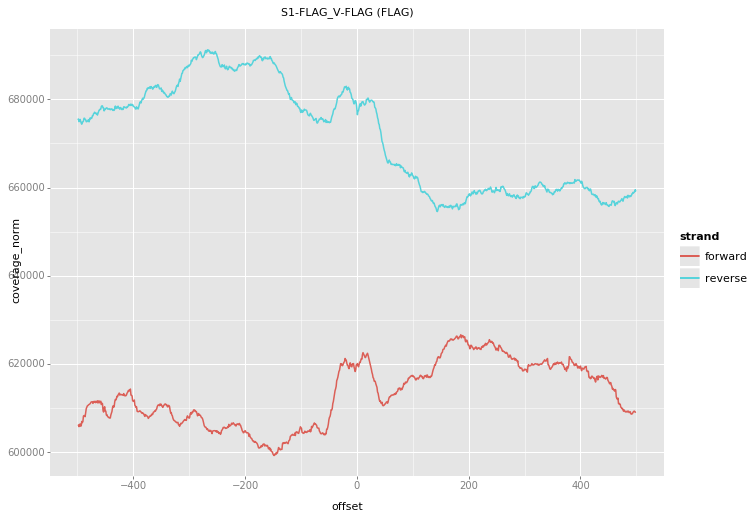

<ggplot: (8773187948047)>


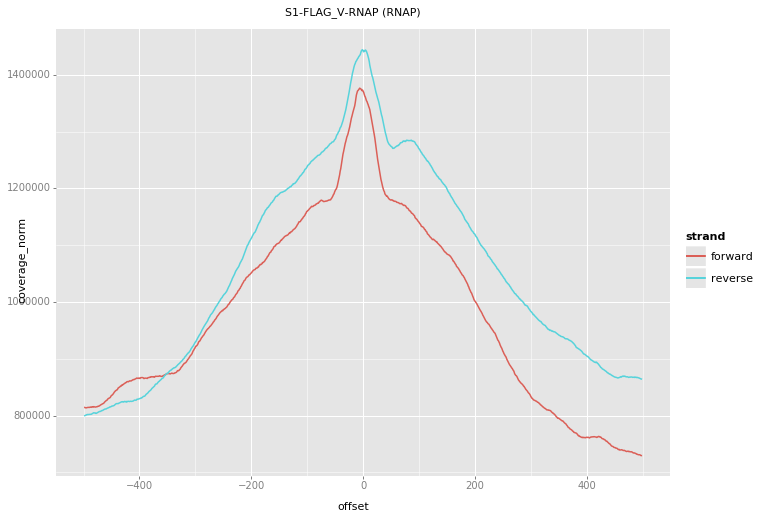

<ggplot: (-9223363263666810494)>


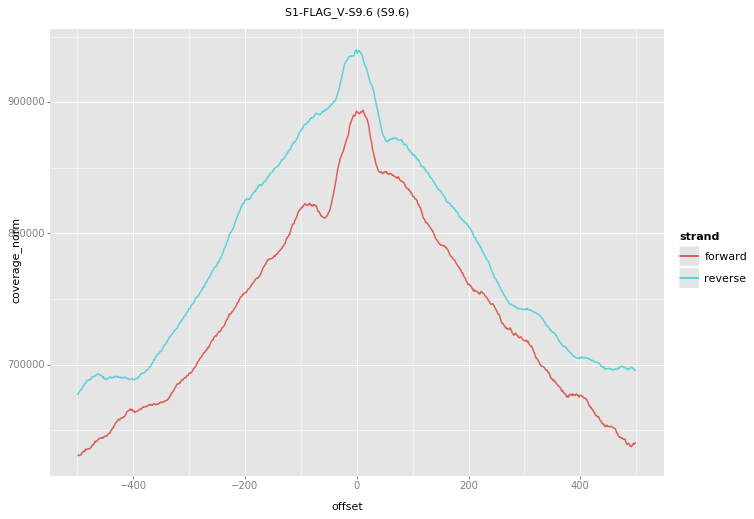

<ggplot: (8773187878036)>


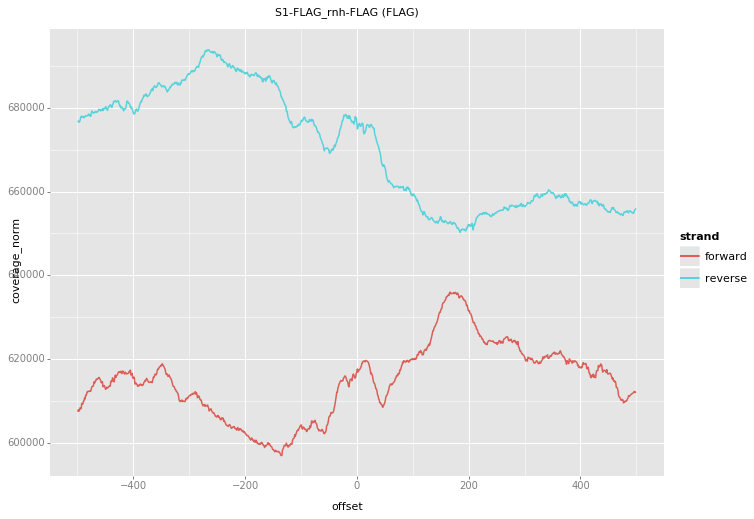

<ggplot: (-9223363263667116277)>


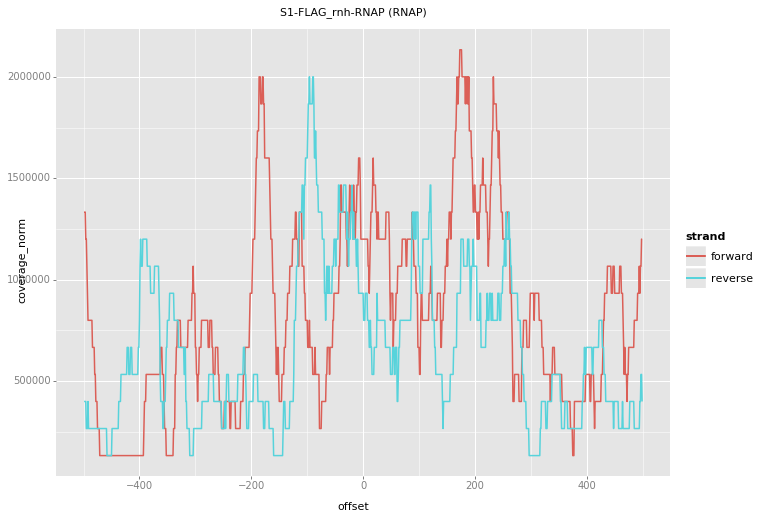

<ggplot: (-9223363263667109418)>


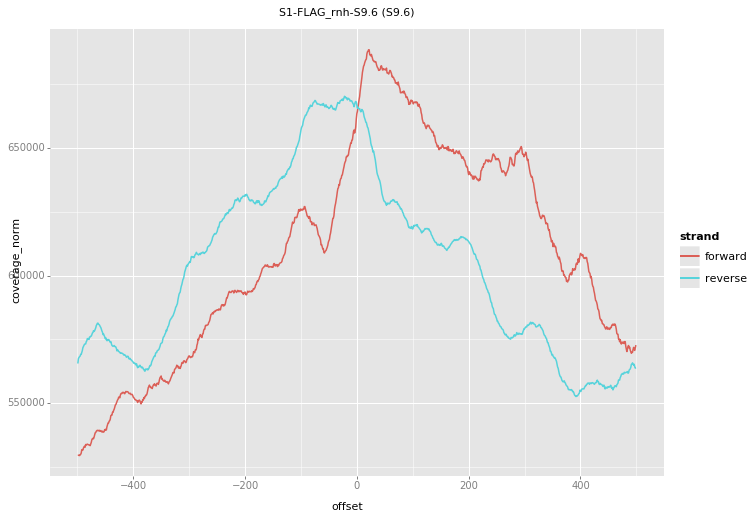

<ggplot: (-9223363263666934598)>


In [25]:
for sample in samples:
    p = ggplot(sample['cm'], aes(x='offset', y='coverage_norm', color='strand')) \
        + geom_line() \
        + ggtitle('{0} ({1})'.format(sample['name'], sample['Ab']))
    print(p)

In [26]:
for sample in samples:
    sample['cm'].to_csv('../results/{}/{}.cm.csv'.format(sample['id'], sample['id']))